In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# setting the seaborn style
sns.set(style="darkgrid")
sns.set_palette("pastel")

df = pd.read_csv("Backup_Dataset_CSV.csv")

In [2]:
# returns (rows, columns)
df.shape

(2886, 5)

In [3]:
df.sample(10)

,Type,Colour,Brand,Source,ImgName
1317,Hoodie,Black,Nike,Grailed,rubUdSNBQAemQV4fsdAw.jpg
781,T-shirt,Blue,Adidas,Picclick,8642795611.jpg
1965,Sweatshirt,Red,Adidas,Poshmark,59756.jpg
1832,Sweatshirt,Black,Adidas,Poshmark,25455.jpg
389,Hoodie,Black,Nike,Picclick,3806462546.jpg
1601,Sweatshirt,Gray,Nike,Grailed,wYJ2NLQHTIezetNn5A52.jpg
392,Hoodie,Black,Nike,Picclick,4661551538.jpg
1329,T-shirt,Blue,Nike,Grailed,sIcXvbmYR3mWlD899LsL.jpg
1049,Hoodie,Blue,Nike,Grailed,Ny5X9OmkT1qOeXhrgSKx.jpg
2414,T-shirt,Red,Nike,Poshmark,23522.jpg


In [4]:
# checking if there are any missing values
df.isna().sum()

Type       0
Colour     0
Brand      0
Source     0
ImgName    0
dtype: int64

In [5]:
# we don't need the image name 
# for the purpose of exploring the data
df = df.drop(columns=['ImgName'])
df

,Type,Colour,Brand,Source
0,T-shirt,Black,Adidas,Grailed
1,T-shirt,Red,Nike,Grailed
2,T-shirt,White,Adidas,Grailed
3,Sweatshirt,Gray,Nike,Grailed
4,T-shirt,Gray,Nike,Grailed
5,T-shirt,White,Adidas,Grailed
6,T-shirt,Black,Nike,Grailed
7,Sweatshirt,Red,Adidas,Grailed
8,T-shirt,Black,Nike,Grailed
9,Sweatshirt,Blue,Adidas,Grailed


In [6]:
df.Type.value_counts()

Hoodie        1225
T-shirt       1172
Sweatshirt     489
Name: Type, dtype: int64

In [7]:
df.Colour.value_counts()

Black    744
Blue     708
Gray     629
Red      434
White    371
Name: Colour, dtype: int64

In [8]:
df.Brand.value_counts()

Adidas    1481
Nike      1405
Name: Brand, dtype: int64

In [9]:
df.Source.value_counts()

Poshmark    1121
Grailed      846
Picclick     790
Shpock       129
Name: Source, dtype: int64

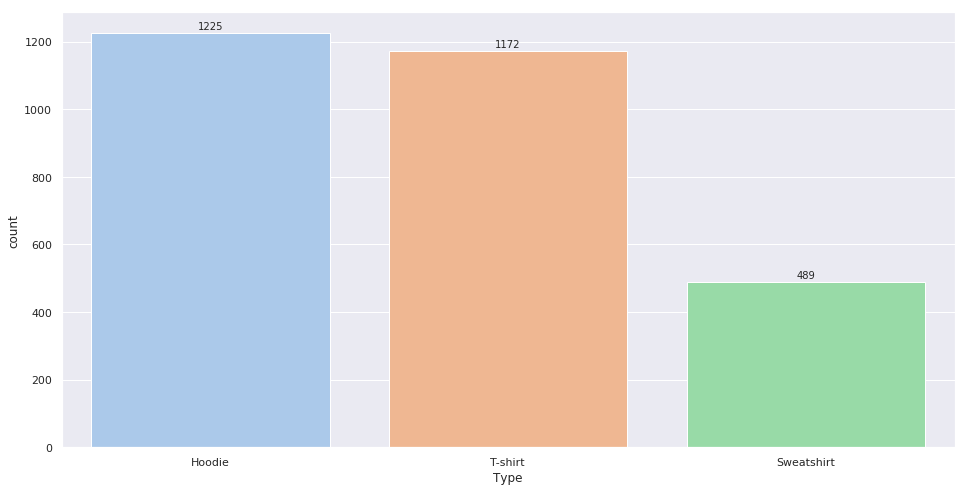

In [10]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=df,
    x='Type',
    order=df.Type.value_counts().index
)

TypeChart.set_xticklabels(TypeChart.get_xticklabels())

for p in TypeChart.patches:
    height = p.get_height()
    width = p.get_width()
    getX = p.get_x()
    TypeChart.text(getX + (width/2), height + 12, height, ha="center")


plt.show()

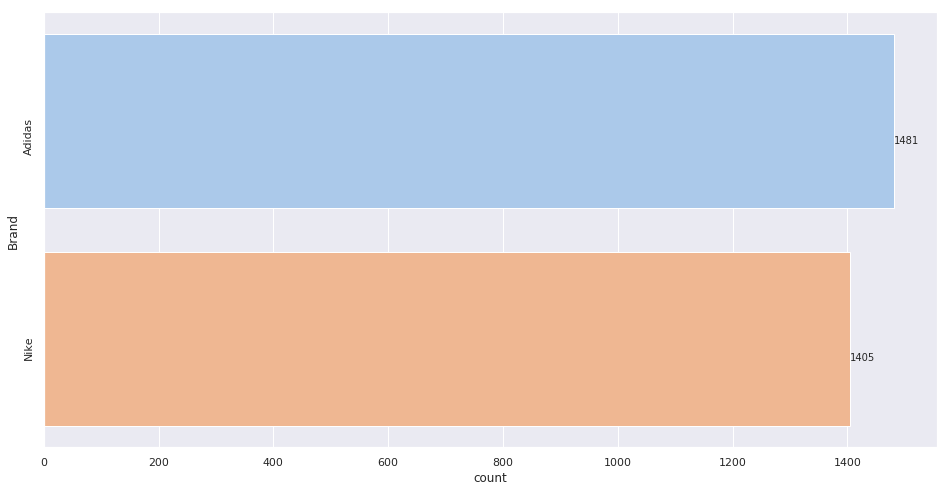

In [11]:
plt.figure(figsize=(16,8))

BrandChart = sns.countplot(
    data=df,
    y='Brand',
    order=df.Brand.value_counts().index
)

BrandChart.set_yticklabels(BrandChart.get_yticklabels(), rotation=90)

initialX = 0
for p in BrandChart.patches:
    width = p.get_width()
    height = p.get_height()
    BrandChart.text(width, initialX + (height/8), width)
    initialX += 1

    
plt.show()

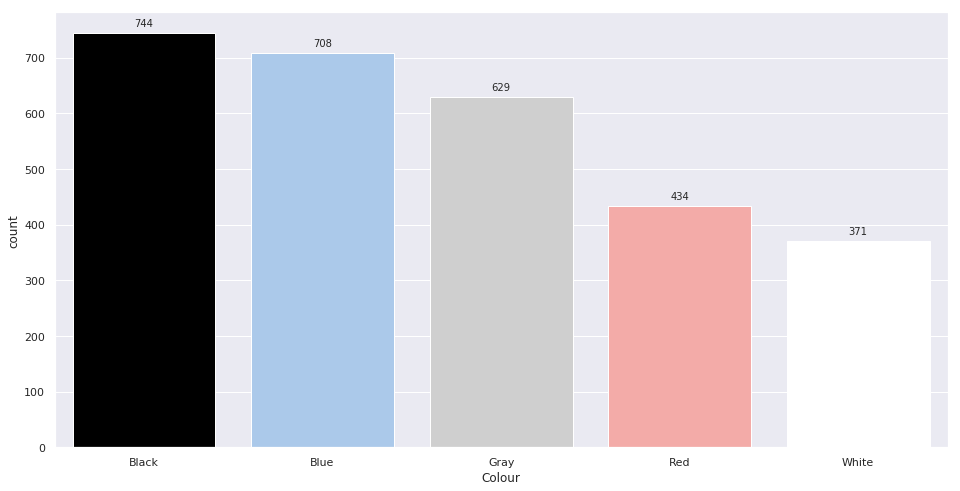

In [12]:
plt.figure(figsize=(16,8))

ColourChart = sns.countplot(
    data=df,
    x='Colour',
    order=df.Colour.value_counts().index,
    palette=["black", "#A1C9F4", "#CFCFCF", "#FF9F9B", "white"]
)

ColourChart.set_xticklabels(ColourChart.get_xticklabels())

for p in ColourChart.patches:
    height = p.get_height()
    width = p.get_width()
    getX = p.get_x()
    ColourChart.text(getX + (width/2), height + 12, height, ha="center")

plt.show()

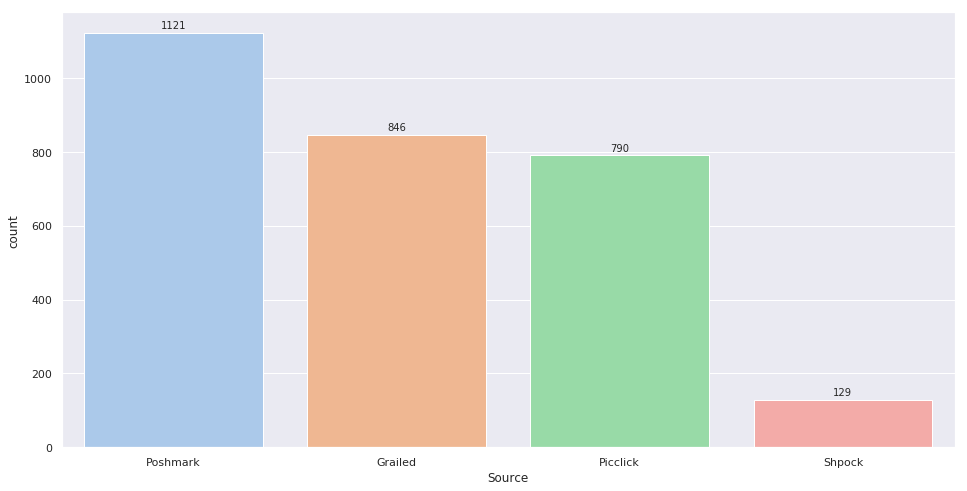

In [13]:
plt.figure(figsize=(16,8))

SourceChart = sns.countplot(
    data=df,
    x='Source',
    order=df.Source.value_counts().index
)

SourceChart.set_xticklabels(SourceChart.get_xticklabels())

for p in SourceChart.patches:
    height = p.get_height()
    width = p.get_width()
    getX = p.get_x()
    SourceChart.text(getX + (width/2), height + 12, height, ha="center")

plt.show()

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


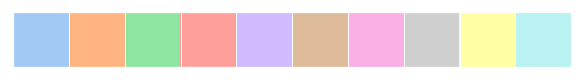

In [14]:
pal = sns.color_palette("pastel")
sns.palplot(pal)
print(pal.as_hex())

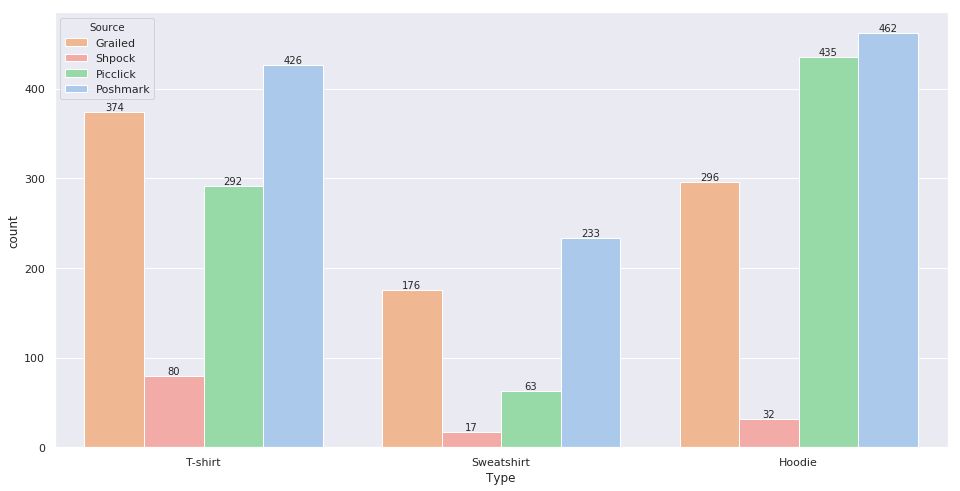

In [15]:
plt.figure(figsize=(16,8))

TypeSourceChart = sns.countplot(
    data=df,
    x='Type',
    hue="Source",
    palette=["#ffb482", "#ff9f9b", "#8de5a1", "#a1c9f4"]
)

TypeSourceChart.set_xticklabels(TypeSourceChart.get_xticklabels())

for p in TypeSourceChart.patches:
    height = p.get_height()
    width = p.get_width()
    getX = p.get_x()
    TypeSourceChart.text(getX + (width/2), height + 2, height, ha="center")

plt.show()

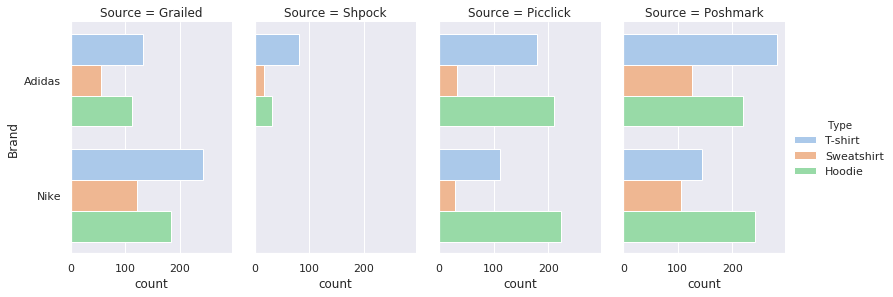

In [16]:
plt.figure(figsize=(16,8))

TypeSourceCat = sns.catplot(
    data=df,
    y='Brand',
    hue="Type",
    col="Source",
    kind="count",
    height=4, aspect=0.7
)

plt.show()

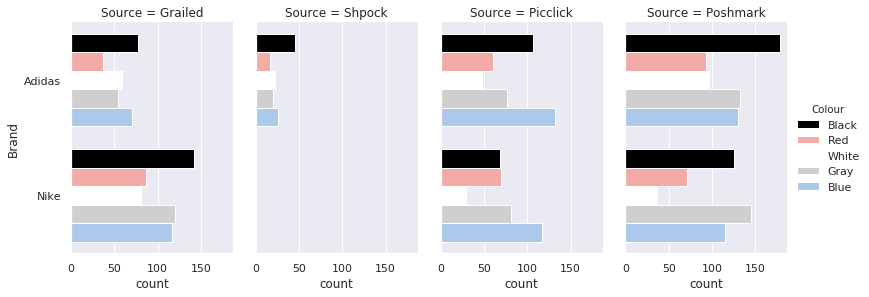

In [17]:
plt.figure(figsize=(16,8))

TypeSourceCat = sns.catplot(
    data=df,
    y='Brand',
    hue="Colour",
    col="Source",
    kind="count",
    height=4, aspect=0.7,
    palette=["black", "#FF9F9B", "white", "#CFCFCF", "#A1C9F4"]
)

plt.show()